In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline


Data shape: (31933, 20)


,SubjectID,Rank,Driver1,Driver2,Driver3,Driver4,Driver5,Driver6,Driver7,Driver8,Driver9,Driver10,Driver11,Driver12,Driver13,Driver14,Driver15,Driver16,Driver17,UpdateDT
1022,1,189,Factor6,Factor14,Factor7,Factor16,Factor1,Factor13,Factor11,Factor10,Factor15,Factor12,Factor17,Factor9,Factor3,Factor5,Factor8,Factor4,Factor2,2021-05-06 14:13:00
2100,1,170,Factor6,Factor14,Factor7,Factor16,Factor1,Factor12,Factor17,Factor13,Factor11,Factor9,Factor15,Factor8,Factor10,Factor3,Factor4,Factor2,Factor5,2021-05-15 21:41:00
3401,1,203,Factor6,Factor7,Factor16,Factor14,Factor1,Factor17,Factor11,Factor10,Factor15,Factor13,Factor12,Factor9,Factor3,Factor8,Factor4,Factor5,Factor2,2021-05-24 10:53:00
4114,1,176,Factor6,Factor7,Factor16,Factor14,Factor1,Factor17,Factor11,Factor10,Factor13,Factor12,Factor15,Factor9,Factor3,Factor8,Factor4,Factor5,Factor2,2021-06-02 13:51:00
5680,1,184,Factor6,Factor14,Factor1,Factor7,Factor13,Factor16,Factor12,Factor17,Factor11,Factor9,Factor15,Factor10,Factor3,Factor4,Factor8,Factor5,Factor2,2021-06-13 22:57:00



Info:
<class 'pandas.core.frame.DataFrame'>
Index: 31933 entries, 1022 to 31881
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SubjectID  31933 non-null  int64         
 1   Rank       31933 non-null  int64         
 2   Driver1    31933 non-null  object        
 3   Driver2    31933 non-null  object        
 4   Driver3    31933 non-null  object        
 5   Driver4    31933 non-null  object        
 6   Driver5    31933 non-null  object        
 7   Driver6    31933 non-null  object        
 8   Driver7    31933 non-null  object        
 9   Driver8    31933 non-null  object        
 10  Driver9    31933 non-null  object        
 11  Driver10   31933 non-null  object        
 12  Driver11   31933 non-null  object        
 13  Driver12   31933 non-null  object        
 14  Driver13   31933 non-null  object        
 15  Driver14   31933 non-null  object        
 16  Driver15   31933 non-null  object  

,SubjectID,Rank,Driver1,Driver2,Driver3,Driver4,Driver5,Driver6,Driver7,Driver8,Driver9,Driver10,Driver11,Driver12,Driver13,Driver14,Driver15,Driver16,Driver17,UpdateDT
count,31933.000000,31933.000000,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933,31933
unique,NaN,NaN,17,17,17,17,17,17,17,17,17,17,17,17,17,17,16,16,14,NaN
top,NaN,NaN,Factor6,Factor6,Factor1,Factor14,Factor14,Factor16,Factor16,Factor17,Factor15,Factor10,Factor10,Factor9,Factor8,Factor8,Factor5,Factor5,Factor3,NaN
freq,NaN,NaN,9881,7820,5167,4802,5040,4789,4620,4419,4574,5140,6370,7290,6601,7549,8352,9034,17911,NaN
mean,608.722920,119.639808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-25 01:05:36.712492032
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-06 14:13:00
25%,299.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01 16:34:00
50%,610.000000,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-06 21:07:00
75%,916.000000,160.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-05 07:57:00
max,1222.000000,265.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-13 08:42:00


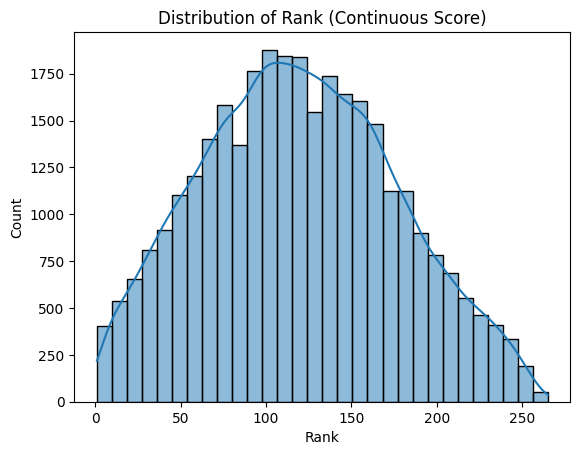

In [2]:
FILE_PATH = "Rank.csv"  # adjust if needed

df = pd.read_csv(FILE_PATH)
df["UpdateDT"] = pd.to_datetime(df["UpdateDT"], errors='coerce')
df.sort_values(["SubjectID", "UpdateDT"], inplace=True)

print("Data shape:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe:")
display(df.describe(include="all"))

sns.histplot(data=df, x="Rank", kde=True, bins=30)
plt.title("Distribution of Rank (Continuous Score)")
plt.show()


In [3]:
# Identify columns that start with 'Driver'
driver_cols = [c for c in df.columns if c.startswith("Driver")] 

# Convert nominal driver columns to dummies (drop_first=True to avoid dummy trap)
df_encoded = pd.get_dummies(df, columns=driver_cols, drop_first=True)

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)


Shape before encoding: (31933, 20)
Shape after encoding: (31933, 270)


In [4]:
# If you want to incorporate time-based info (like days from earliest), do so here.

if "UpdateDT" in df_encoded.columns:
    earliest_date = df_encoded["UpdateDT"].min()
    df_encoded["DaysFromEarliest"] = (df_encoded["UpdateDT"] - earliest_date).dt.days

    # Example: difference in days between consecutive rows of same SubjectID
    df_encoded["TimeDiff"] = df_encoded.groupby("SubjectID")["UpdateDT"].diff().dt.days
    df_encoded["TimeDiff"] = df_encoded["TimeDiff"].fillna(0)


In [5]:
# We decide which columns to use for clustering. Typically exclude ID & UpdateDT.

exclude_cols = ["SubjectID", "UpdateDT"]  # won't cluster on ID or actual date

# Option A: Include "Rank" as a feature
# Option B: Exclude "Rank" to see how clusters differ in rank after the fact.
include_rank = True

if include_rank:
    exclude_cols.extend([])  # nothing extra to exclude
else:
    exclude_cols.append("Rank")  # if we don't want to cluster on rank

feature_cols = [c for c in df_encoded.columns if c not in exclude_cols]

X = df_encoded[feature_cols].copy()

# Check for missing
missing = X.isnull().sum()
print("\nMissing values in features:")
print(missing[missing > 0])

# We'll fill or drop them if needed. For now, assume minimal missing.
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature matrix shape:", X_scaled.shape)



Missing values in features:
Series([], dtype: int64)
Feature matrix shape: (31933, 270)


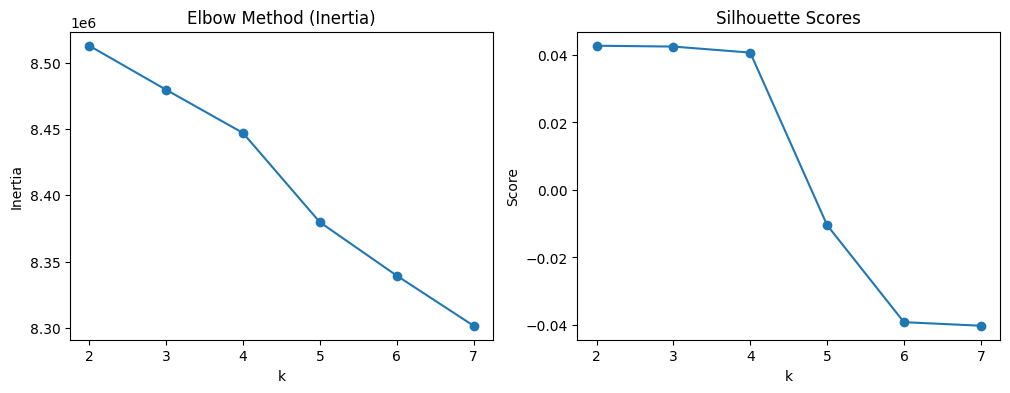

In [6]:

k_values = range(2, 8)

inertias = []
sils = []
for k in k_values:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    sils.append(silhouette_score(X_scaled, kmeans_temp.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(k_values, inertias, marker='o')
ax1.set_title("Elbow Method (Inertia)")
ax1.set_xlabel("k")
ax1.set_ylabel("Inertia")

ax2.plot(k_values, sils, marker='o')
ax2.set_title("Silhouette Scores")
ax2.set_xlabel("k")
ax2.set_ylabel("Score")

plt.show()


In [9]:
best_k = 3  # pick from the elbow/silhouette results
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

print("Cluster label counts:")
print(pd.Series(cluster_labels).value_counts())

# Attach labels back to df_encoded for interpretation
clustered_df = df_encoded.copy()
clustered_df["Cluster"] = cluster_labels

print("\nMean of 'Rank' by cluster (if included in features):")
if "Rank" in clustered_df.columns:
    print(clustered_df.groupby("Cluster")["Rank"].mean())

# We can also look at means of any driver dummy columns
print("\nSample driver factor frequencies by cluster:")
driver_dummy_cols = [c for c in clustered_df.columns if c.startswith("Driver")] # after encoding
means_by_cluster = clustered_df.groupby("Cluster")[driver_dummy_cols].mean()
display(means_by_cluster)


Cluster label counts:
2    18847
0    12633
1      453
Name: count, dtype: int64

Mean of 'Rank' by cluster (if included in features):
Cluster
0     81.585292
1    142.660044
2    144.594153
Name: Rank, dtype: float64

Sample driver factor frequencies by cluster:


,Driver1_Factor10,Driver1_Factor11,Driver1_Factor12,Driver1_Factor13,Driver1_Factor14,Driver1_Factor15,Driver1_Factor16,Driver1_Factor17,Driver1_Factor2,Driver1_Factor3,...,Driver17_Factor15,Driver17_Factor17,Driver17_Factor2,Driver17_Factor3,Driver17_Factor4,Driver17_Factor5,Driver17_Factor6,Driver17_Factor7,Driver17_Factor8,Driver17_Factor9
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000792,0.286947,0.005858,0.102509,0.004433,0.000079,0.009578,0.002296,0.009420,0.014328,...,0.000633,0.000712,0.024301,0.587271,0.143830,0.163857,0.001267,0.019077,0.051611,0.001504
1,0.004415,0.000000,0.013245,0.035320,0.013245,0.008830,0.048565,0.030905,0.030905,0.015453,...,0.000000,0.000000,0.094923,0.538631,0.178808,0.121413,0.000000,0.028698,0.028698,0.000000
2,0.000955,0.231124,0.015069,0.035549,0.033162,0.003184,0.028811,0.025946,0.010930,0.005147,...,0.000000,0.000000,0.113970,0.543747,0.217117,0.101873,0.000478,0.004457,0.002812,0.000000


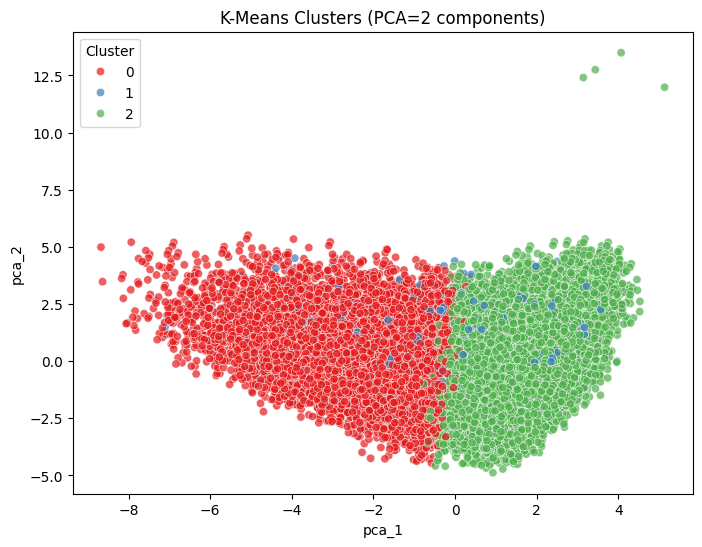

In [10]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled)
clustered_df["pca_1"] = pca_result[:, 0]
clustered_df["pca_2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=clustered_df,
    x="pca_1", y="pca_2",
    hue="Cluster",
    palette="Set1",
    alpha=0.7
)
plt.title("K-Means Clusters (PCA=2 components)")
plt.show()


Train set size: 26502
Test set size : 5431

--- Ordinal Model (mord.LogisticIT) Evaluation ---
Test MSE: 15549.25
Test MAE: 110.98
Spearman Corr: 0.121

Top 20 Coefficients:


,Feature,Coefficient
234,Driver15_Factor5,1.722305
233,Driver15_Factor4,1.561112
231,Driver15_Factor2,1.377361
237,Driver15_Factor8,1.374088
232,Driver15_Factor3,1.227229
236,Driver15_Factor7,0.920336
238,Driver15_Factor9,0.562933
224,Driver15_Factor10,0.531010
98,Driver7_Factor12,0.381754
102,Driver7_Factor16,0.377684


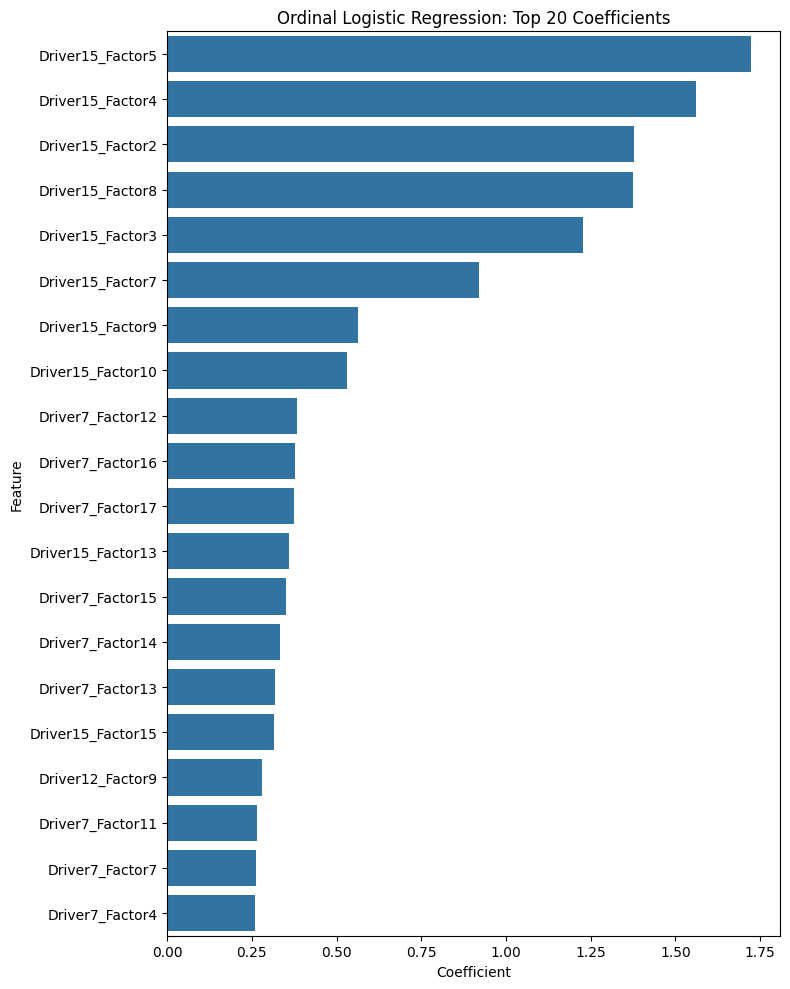


Model saved as mord_ordinal_model.pkl


In [12]:
# %% [markdown]
# # Cell 9: Ordinal Logistic Regression (mord)

# %%
import pickle
from mord import LogisticIT
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr

# 1) We'll do a time-based split on df_encoded
cutoff_date = df_encoded["UpdateDT"].quantile(0.80)
train_mord = df_encoded[df_encoded["UpdateDT"] <= cutoff_date]
test_mord  = df_encoded[df_encoded["UpdateDT"] >  cutoff_date]

print(f"Train set size: {len(train_mord)}")
print(f"Test set size : {len(test_mord)}")

# 2) Define features and target
# We exclude SubjectID, UpdateDT, and Rank from the features
exclude_cols2 = ["SubjectID", "UpdateDT", "Rank"]
feature_cols2 = [c for c in df_encoded.columns if c not in exclude_cols2]

X_train_mord = train_mord[feature_cols2]
y_train_mord = train_mord["Rank"]
X_test_mord  = test_mord[feature_cols2]
y_test_mord  = test_mord["Rank"]

# (Optional) If you want to scale your features here as well:
scaler_mord = StandardScaler()
X_train_mord_scaled = scaler_mord.fit_transform(X_train_mord)
X_test_mord_scaled  = scaler_mord.transform(X_test_mord)

# 3) Initialize the mord LogisticIT model
# alpha is the ridge regularization strength; you can tune this if needed
model_mord = LogisticIT(alpha=1.0)

# 4) Fit the model on training data
model_mord.fit(X_train_mord_scaled, y_train_mord)

# 5) Predict on test data
y_pred_mord = model_mord.predict(X_test_mord_scaled)

# 6) Evaluate with MSE, MAE, Spearman correlation
mse_mord = mean_squared_error(y_test_mord, y_pred_mord)
mae_mord = mean_absolute_error(y_test_mord, y_pred_mord)
spearman_corr_mord, _ = spearmanr(y_test_mord, y_pred_mord)

print("\n--- Ordinal Model (mord.LogisticIT) Evaluation ---")
print(f"Test MSE: {mse_mord:.2f}")
print(f"Test MAE: {mae_mord:.2f}")
print(f"Spearman Corr: {spearman_corr_mord:.3f}")

# 7) (Optional) Inspect the model's learned coefficients
coef_values = model_mord.coef_.ravel()
feature_effects = pd.DataFrame({
    "Feature": feature_cols2,
    "Coefficient": coef_values
}).sort_values(by="Coefficient", ascending=False)

print("\nTop 20 Coefficients:")
display(feature_effects.head(20))

# Plot the top 20 positive coefficients for a quick view
plt.figure(figsize=(8, 10))
top_20 = feature_effects.head(20)
sns.barplot(data=top_20, x="Coefficient", y="Feature", orient="h")
plt.title("Ordinal Logistic Regression: Top 20 Coefficients")
plt.tight_layout()
plt.show()

# 8) Saving the model
with open("mord_ordinal_model.pkl", "wb") as f:
    pickle.dump(model_mord, f)

print("\nModel saved as mord_ordinal_model.pkl")


In [ ]:
# %% [markdown]
# # Cell 10: Making Predictions with the Trained Ordinal Logistic Regression Model

# %%
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# 1) Load new data
# Replace 'new_data.csv' with your actual file path
new_data = pd.read_csv('new_data.csv')

# 2) Apply one-hot encoding to categorical variables
# Assuming 'Driver1', 'Driver2', ..., 'DriverN' are the categorical columns
driver_cols = [col for col in new_data.columns if col.startswith('Driver')]
new_data_encoded = pd.get_dummies(new_data, columns=driver_cols, drop_first=True)

# 3) Align features with training data
# Load the original training data to get the correct feature columns
# Replace 'training_data.csv' with your actual training data file path
training_data = pd.read_csv('training_data.csv')
training_driver_cols = [col for col in training_data.columns if col.startswith('Driver')]
training_encoded = pd.get_dummies(training_data, columns=training_driver_cols, drop_first=True)
feature_cols = [col for col in training_encoded.columns if col not in ['SubjectID', 'UpdateDT', 'Rank']]

# Ensure new data has all the feature columns
for col in feature_cols:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0  # Add missing columns with default value 0

# Ensure the order of columns matches
new_data_encoded = new_data_encoded[feature_cols]

# 4) Scale the new data using the same scaler fitted during training
# Load the scaler
with open('scaler_mord.pkl', 'rb') as f:
    scaler_mord = pickle.load(f)

# Scale the new data
X_new_scaled = scaler_mord.transform(new_data_encoded)

# 5) Load the trained model
with open('mord_ordinal_model.pkl', 'rb') as f:
    model_mord = pickle.load(f)

# 6) Make predictions
predicted_ranks = model_mord.predict(X_new_scaled)

# Add predictions to the new data
new_data['Predicted_Rank'] = predicted_ranks

# Display the new data with predictions
print(new_data.head())


# More stuff

In [ ]:

"""
In this section, we demonstrate how to train a predictive model (e.g., RandomForestRegressor)
for the continuous 'Rank' score. We’ll do a simple example with a time-based split (older data
as train, newer data as test). If you prefer a random split, you can just import train_test_split
from sklearn and ignore the timestamps.

Steps:
1. Create a new DataFrame from df_encoded.
2. Decide on a time-based cutoff (e.g., 80th percentile).
3. Separate features vs. target (Rank).
4. Train a RandomForestRegressor.
5. Evaluate with MSE, MAE, Spearman correlation.
6. Show how to do predictions.
"""

import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr

# 1) We'll copy df_encoded into a new DataFrame
model_df = df_encoded.copy()

# 2) Time-based train/test split (80% oldest => train, 20% newest => test).
cutoff_date = model_df["UpdateDT"].quantile(0.80)  # or another approach
train_df = model_df[model_df["UpdateDT"] <= cutoff_date]
test_df  = model_df[model_df["UpdateDT"] >  cutoff_date]

print(f"Training set size: {len(train_df)}")
print(f"Test set size    : {len(test_df)}")

# 3) Define features & target
# Exclude ID, date, and 'Rank' (since 'Rank' is the target we want to predict).
exclude_cols2 = ["SubjectID", "UpdateDT", "Rank"]
feature_cols2 = [col for col in model_df.columns if col not in exclude_cols2]

X_train = train_df[feature_cols2]
y_train = train_df["Rank"]
X_test  = test_df[feature_cols2]
y_test  = test_df["Rank"]

# 4) (Optional) Scale features for the model
# It's often beneficial to scale numeric columns. We can reuse StandardScaler if we want.
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled  = scaler2.transform(X_test)

# 5) Initialize and train a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 6) Predictions & evaluation
y_pred = rf.predict(X_test_scaled)

# Mean Squared Error, Mean Absolute Error, Spearman correlation
mse_val = mean_squared_error(y_test, y_pred)
mae_val = mean_absolute_error(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)

print("\n--- RandomForestRegressor Evaluation (Time-based Split) ---")
print(f"Test MSE: {mse_val:.2f}")
print(f"Test MAE: {mae_val:.2f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")

# 7) Save the model for future usage
'''
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("\nModel saved to 'random_forest_model.pkl'")
'''


In [ ]:

"""
If you want to predict rank on new/unseen data, you must:
1. Apply the same one-hot encoding to the new data (matching old factor columns).
2. Scale using the same scaler (fit on training data).
3. Load the trained model and call .predict().

Below is a simplified example. If you have a 'new_data.csv' with the same columns,
you would do something like:
"""

# Example demonstration (commented out):
"""
new_df = pd.read_csv('new_data.csv')
new_df['UpdateDT'] = pd.to_datetime(new_df['UpdateDT'], errors='coerce')
# Sort, etc., if needed

# 1) One-hot encode the driver columns in the same way. You must replicate the exact
#    dummy column structure. Usually, you'd re-use the same method or store the columns.
#    For example:
driver_cols_new = [c for c in new_df.columns if c.startswith('Driver')]
new_df_encoded = pd.get_dummies(new_df, columns=driver_cols_new, drop_first=True)

# Make sure new_df_encoded has the same columns as X_train did
# If any columns are missing, you might need to add them with default 0. 
# If new columns appear, you should drop or handle them consistently.

# 2) Scale using the same scaler
X_new = new_df_encoded[feature_cols2]  # same feature_cols2 as before
X_new_scaled = scaler2.transform(X_new)

# 3) Load the model and predict
with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)

new_preds = loaded_rf.predict(X_new_scaled)
print(new_preds)
"""

